In [28]:
import time
import random
import datetime
import sys
import numpy 
from utils.parameters import parse_command_line
from utils.bayesian_optimization import *
from utils.default_params import *

np.set_printoptions(precision = 4, suppress = True)
np.set_printoptions(threshold=sys.maxsize)

seed = 42
nwarmup = 20
nbayes = 180
lattice_spacing = 5
verbose_ = True
kernel_choice = 'matern'
discard_percentage = 0.2
load_data = None

In [50]:
import pandas as pd
opt_history_theo = pd.read_csv("output/p=5_thirteen_shots_451_seed_43_0.2.csv")
opt_history_exp = pd.read_csv("output/p=5_thirteen_shots_450_seed_43_0.2.csv")

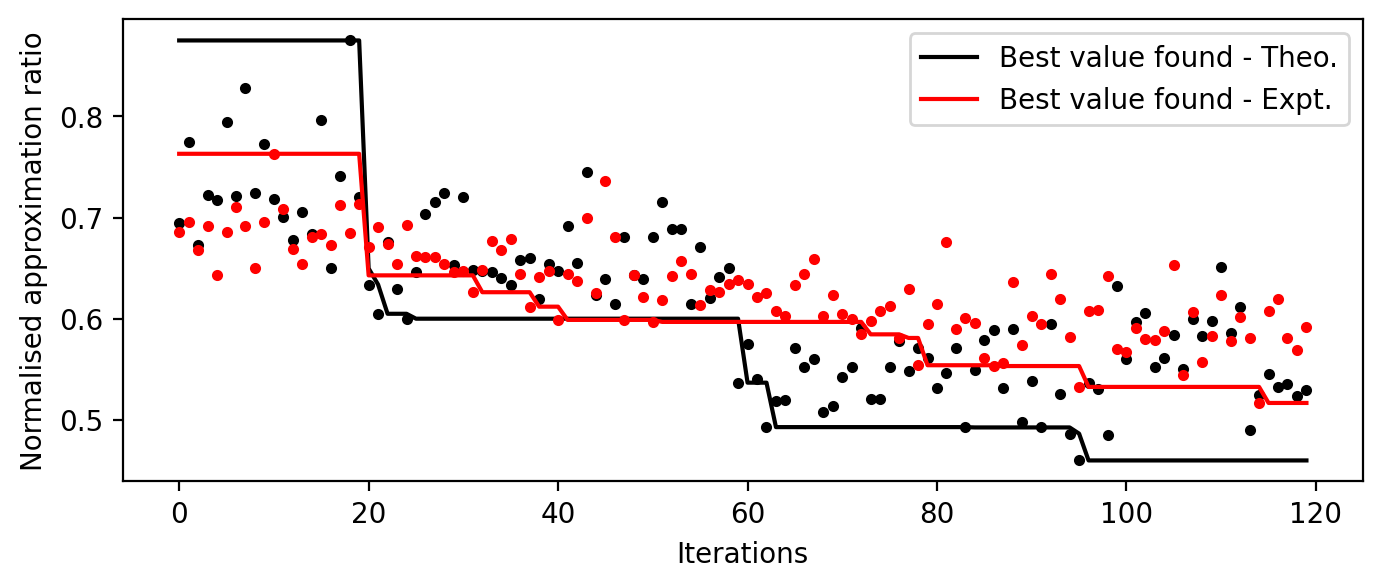

In [54]:
plt.figure(dpi=200,figsize=(8,3))
plt.plot(range(len(opt_history_theo)),[1+o/7 for o in opt_history_theo["energy_best"]],color='k',label="Best value found - Theo.")
plt.plot(range(len(opt_history_theo)),[1+o/7 for o in opt_history_theo["energy_sampled"]],linestyle='',marker='.',color='k')
plt.plot(range(len(opt_history_exp)),[1+o/7 for o in opt_history_exp["energy_best"]],color='r',label="Best value found - Expt.")
plt.plot(range(len(opt_history_exp)),[1+o/7 for o in opt_history_exp["energy_sampled"]],linestyle='',marker='.',color='r')
plt.xlabel("Iterations")
plt.ylabel("Normalised approximation ratio")
plt.legend()
plt.show()

In [20]:
from pulser_pasqal import PasqalCloud

username = "lucas.leclerc@pasqal.com"
project_id = "5415d87a-eaa2-48f4-b546-c755754fe73e"
password = "Luc92cloud!"

connection = PasqalCloud(
    username=username,  # Your username or email address for the Pasqal Cloud Platform
    project_id=project_id,  # The ID of the project associated to your account
    password=password,  # The password for your Pasqal Cloud Platform account
)

In [21]:
device_used = connection.fetch_available_devices()['FRESNEL']
trap_layout = list(device_used.calibrated_register_layouts.values())[0]

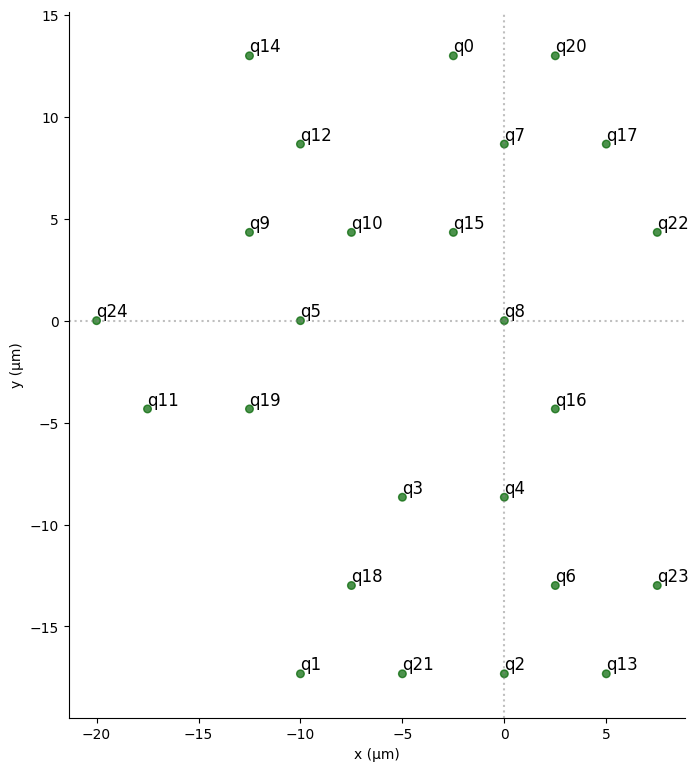

In [23]:
trap_list = [27, 10, 28, 20, 29, 12, 33, 31, 30, 8, 17, 1, 13, 37, 9, 26, 34, 40, 15, 7, 36, 19, 44, 42, 0]
pos_ = trap_layout.coords[trap_list]
rydberg_radius = device_used.rydberg_blockade_radius(2*np.pi*1) 
reg = trap_layout.define_register(*trap_list)
reg.draw()
G = nx.Graph()
edges=[]
distances = []
for n in range(len(pos_)-1):
    for m in range(n+1, len(pos_)):
        pwd = ((pos_[m][0]-pos_[n][0])**2
                +(pos_[m][1]-pos_[n][1])**2)**0.5
        distances.append(pwd)
        if pwd < rydberg_radius:
            # Below rbr, vertices are connected
            edges.append([n,m]) 
            #And the interaction is given by C_6/(h*d^6)
            #self.U.append(self.C_6_over_h/(pwd**6)) 
G.add_nodes_from(range(len(pos_)))
G.add_edges_from(edges)

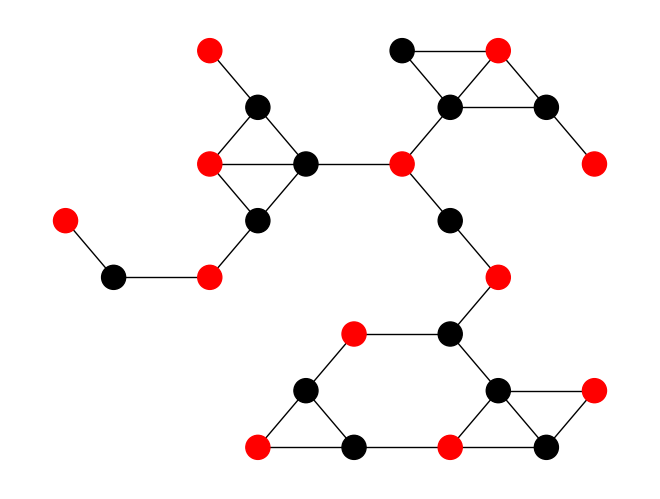

In [27]:
string = "0111000001000011100110111"
nx.draw(G,pos=pos_,node_color = [["k","r"][int(i)] for i in string])